### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [235]:
data = pd.read_csv('../data/coupons.csv')

In [236]:
pd.set_option('display.max_columns', None)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

First we will look into NaN values and decide what we can do about it

In [237]:
null_vals = data.isnull().sum()
print(null_vals)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


What percent of the data do we have the car column null for?

In [238]:
car_null_ratio = data['car'].isnull().sum()/data['car'].size
print("percent of car column empty: ",format(car_null_ratio, '.2%'))

percent of car column empty:  99.15%


We see that more than 99% of our data is missing car column so we can effectively drop this column

3. Decide what to do about your missing data -- drop, replace, other...

In [239]:
#Car column seems to be NaN for the majority of the dataset and doesn't seem to be relevant for our analysis so we'll drop the column
data = data.drop(columns=['car'])
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0


3.1. Let's look at values that should be int64 but are object. We should convert them to int64 for better analysis later on

In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

3.2. Columns like age, bar, coffeeHouse, carryAway, RestaurantLessThan20,Restaurant20To50, and salary should be int64 values so let's convert them

In [261]:
#Convert age values to int64
data['age'] = data['age'].replace("50plus", 51)
data['age'] = data['age'].replace("below21", 20)
data['age'] = pd.to_numeric(data['age'])
data['age'].unique()

array([21, 46, 26, 31, 41, 51, 36, 20], dtype=int64)

In [242]:
#Convert Bar values to int64
data['Bar'] = data['Bar'].fillna(-1)
data['Bar'] = data['Bar'].replace("never", 0)
data['Bar'] = data['Bar'].replace("less1", 1)
data['Bar'] = data['Bar'].replace("1~3", 2)
data['Bar'] = data['Bar'].replace("4~8", 6)
data['Bar'] = data['Bar'].replace("gt8", 9)
data['Bar'].unique()

array([ 0,  1,  2,  9, -1,  6], dtype=int64)

In [243]:
#Convert CoffeeHouse values to int64
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(-1)
data['CoffeeHouse'] = data['CoffeeHouse'].replace("never", 0)
data['CoffeeHouse'] = data['CoffeeHouse'].replace("less1", 1)
data['CoffeeHouse'] = data['CoffeeHouse'].replace("1~3", 2)
data['CoffeeHouse'] = data['CoffeeHouse'].replace("4~8", 6)
data['CoffeeHouse'] = data['CoffeeHouse'].replace("gt8", 9)
data['CoffeeHouse'].unique()

array([ 0,  1,  6,  2,  9, -1], dtype=int64)

In [244]:
#Convert CarryAway values to int64
data['CarryAway'] = data['CarryAway'].fillna(-1)
data['CarryAway'] = data['CarryAway'].replace("never", 0)
data['CarryAway'] = data['CarryAway'].replace("less1", 1)
data['CarryAway'] = data['CarryAway'].replace("1~3", 2)
data['CarryAway'] = data['CarryAway'].replace("4~8", 6)
data['CarryAway'] = data['CarryAway'].replace("gt8", 9)
data['CarryAway'].unique()

array([-1,  6,  2,  9,  1,  0], dtype=int64)

In [245]:
#Convert RestaurantLessThan20 values to int64
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(-1)
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].replace("never", 0)
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].replace("less1", 1)
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].replace("1~3", 2)
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].replace("4~8", 6)
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].replace("gt8", 9)
data['RestaurantLessThan20'].unique()

array([ 6,  2,  1,  9, -1,  0], dtype=int64)

In [246]:
#Convert Restaurant20To50 values to int64
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(-1)
data['Restaurant20To50'] = data['Restaurant20To50'].replace("never", 0)
data['Restaurant20To50'] = data['Restaurant20To50'].replace("less1", 1)
data['Restaurant20To50'] = data['Restaurant20To50'].replace("1~3", 2)
data['Restaurant20To50'] = data['Restaurant20To50'].replace("4~8", 6)
data['Restaurant20To50'] = data['Restaurant20To50'].replace("gt8", 9)
data['Restaurant20To50'].unique()

array([ 2,  1,  0,  9,  6, -1], dtype=int64)

In [247]:
#Convert income values to int64
data['income'] = data['income'].replace("$37500 - $49999", 43749)
data['income'] = data['income'].replace("$62500 - $74999", 68749)
data['income'] = data['income'].replace("$12500 - $24999", 18749)
data['income'] = data['income'].replace("$75000 - $87499", 81249)
data['income'] = data['income'].replace("$50000 - $62499", 56249)
data['income'] = data['income'].replace("$25000 - $37499", 31249)
data['income'] = data['income'].replace("$100000 or More", 100001)
data['income'] = data['income'].replace("$87500 - $99999", 93749)
data['income'] = data['income'].replace("Less than $12500", 12000)
data['income'].unique()

array([ 43749,  68749,  18749,  81249,  56249,  31249, 100001,  93749,
        12000], dtype=int64)

Now we can see that our data is cleaner with int values where we need them to be

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  int64 
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  int64 
 14  Bar                   12684 non-null  int64 
 15  CoffeeHouse           12684 non-null

4. What proportion of the total observations chose to accept the coupon? 



In [249]:
proportion = data['Y'].mean()
proportion

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Total sum of coupons accepted')

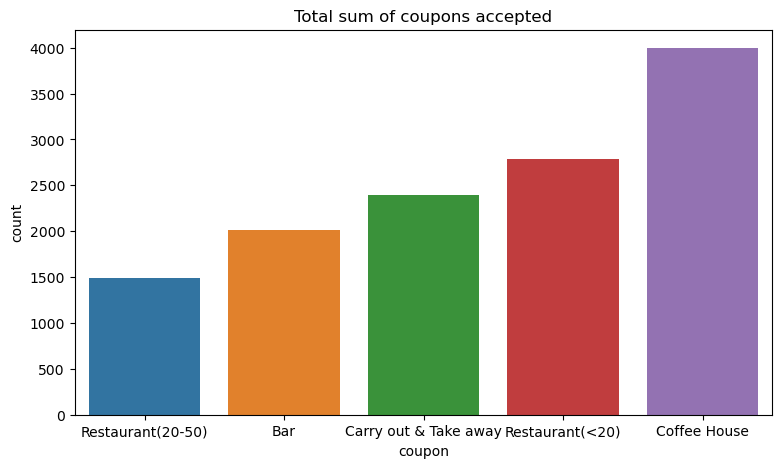

In [280]:
fig, ax = plt.subplots(figsize=(9, 5))
sorted_vals = data['coupon'].value_counts().sort_values(ascending=True).reset_index()
sns.barplot(sorted_vals, x = 'coupon', y='count', ax=ax)
plt.title("Total sum of coupons accepted")

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Total Temperature count')

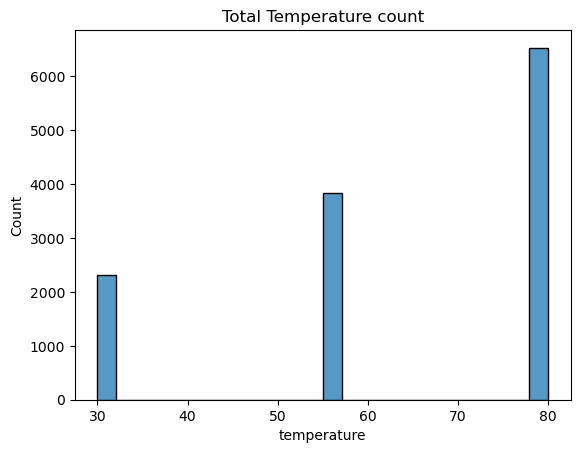

In [281]:
sns.histplot(data['temperature'])
plt.title("Total Temperature count")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [252]:
barData = data.query("coupon == 'Bar'")
#Remove all NaN values (previously assigned an int value of -1)
barData = barData[barData['Bar'] != -1]

2. What proportion of bar coupons were accepted?


In [253]:
bar_proportion = barData['Y'].mean()
print(bar_proportion, "of the bar coupons were accepted")

0.4103206412825651 of the bar coupons were accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [254]:
#Query for bars > 3 and find the acceptance rate between those people. Compare that to drivers that went more
greater_than = format(barData.query('Bar > 3')['Y'].mean(), '.3%')
less_than = format(barData.query('Bar <= 3')['Y'].mean(), '.3%')
print('Acceptance rate of those who went to a bar more than 3 times a month:', greater_than)
print('Acceptance rate of those who went to a bar less than or equal to 3 times a month:', less_than)

Acceptance rate of those who went to a bar more than 3 times a month: 76.884%
Acceptance rate of those who went to a bar less than or equal to 3 times a month: 37.062%


3.1 We see that those who go to bars more than 3 times a month are more likely to accept the coupon compared to the ones that only go to bars less than or equal to 3 times a month

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [267]:
# Use query tool to filter and find the accptance rate for Bar>1 and age >25. we then find all the other data and find the acceptance rate
filtered_drivers = barData.query('Bar > 1 and age > 25')
total_drivers = barData[~barData.index.isin(filtered_drivers.index)]
rate1 = format(filtered_drivers['Y'].mean(), '.3%')
rate2 = format(total_drivers['Y'].mean(), '.3%')
print("acceptance rate of filtered value:", rate1)
print("acceptance rate of all other drivers:", rate2)

acceptance rate of filtered value: 69.524%
acceptance rate of all other drivers: 33.439%


4.1 Drivers that go to bars more than once a month and are over the age of 25 are about 36% more likely to accept the coupon compared to all other drivers

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [268]:
# Use query tool to filter and find the acceptance rate of the given values. We then find all the other data and find the acceptance rate
filtered_bar = barData.query("Bar > 1 and passanger != 'Kid(s)' and occupation != 'Farming Fishing & Forestry'")
all_others = barData[~barData.index.isin(filtered_bar.index)]
data1 = format(filtered_bar['Y'].mean(), '.3%')
data2 = format(all_others['Y'].mean(), '.3%')
print("acceptance rate of filtered value:", data1)
print("acceptance rate of all other drivers:", data2)

acceptance rate of filtered value: 71.325%
acceptance rate of all other drivers: 29.481%


5.1. We see a difference of 42%. Drivers that go to bars more than once a month with no kid passangers and are not farmers,  fishers or foresters are more likely to accept the coupon compared to those that are not.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [269]:
filtered_data1 = barData.query("Bar > 1 and passanger != 'kid(s)' and maritalStatus != 'Widowed'")
filtered_total1 = format(filtered_data1['Y'].mean(), '.3%')
print("more than once a month, not a kid, not widowed:", filtered_total1)

more than once a month, not a kid, not widowed: 68.792%


In [270]:
filtered_data2 = barData.query("Bar > 1 and age < 30")
filtered_total2 = format(filtered_data2['Y'].mean(), '.3%')
print(" bars more than once a month and are under the age of 30 :", filtered_total2)

 bars more than once a month and are under the age of 30 : 72.174%


In [271]:
filtered_data3 = barData.query("RestaurantLessThan20 > 4 and income < 50000")
filtered_total3 = format(filtered_data3['Y'].mean(), '.3%')
print("cheap restaurants more than 4 times a month and income less than 50K:", filtered_total3)

cheap restaurants more than 4 times a month and income less than 50K: 45.723%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

* Majority of bar coupons that were accepted were by drivers that go to bars more than once a month.
* Of those who go more than once a month, majority of them are over the age of 25.
* Drivers that have kids and go to bars less than once a month are the least likely to accept Bar coupons

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### 1.  I would like to investigate restaurant<20 coupon and who accepts it more based on income and marital status

In [272]:
#Filter out Restauants less than $20
restData = data[data['coupon'] == 'Restaurant(<20)']
restData['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
 2    1157
 6     800
 1     460
 9     288
 0      54
-1      27
Name: count, dtype: int64

1.1. Here we see some negative values so we will clean it up and evaluate the acceptance rate

In [273]:
#Remove all the -1 values which are NaN values in the original dataset
cleanData = restData[restData['RestaurantLessThan20'] != -1]
restaurant = cleanData['Y'].mean()
print("total acceptance rate:",format(restaurant, '.3%'))

total acceptance rate: 70.533%


1.2. We can see that 70% of coupons for restaurants < $20 are accepted by drivers

#### 2. Let's look at the relationship between income level and total restaurant coupons accepted

In [274]:
#Find the total number of coupons accepted by summing up all Y==1 values. 52676 is the mean income for the filtered dataset
gt = cleanData.query("income > 52676")['Y'].sum()
ls = cleanData.query("income <= 52676")['Y'].sum()
print("Total number of coupons accepted for above average income:", gt)
print("Total number of coupons accepted for below average income:", ls)

Total number of coupons accepted for above average income: 912
Total number of coupons accepted for below average income: 1034


In [275]:
#Find the acceptance rate by taking the mean of all Y==1 values.
gt = cleanData.query("income > 52676")['Y'].mean()
ls = cleanData.query("income <= 52676")['Y'].mean()
print("Acceptance rate for above average income:", format(gt, '.3%'))
print("Acceptance rate for below average income:", format(ls, '.3%'))

Acceptance rate for above average income: 70.046%
Acceptance rate for below average income: 70.968%


2.1. We can see that eventhough more people in the lower income bracket accepted cheaper restaurant coupons, The acceptance rate for each group is relatively the same.

#### 3.0. Relationship between Marital Status and income level

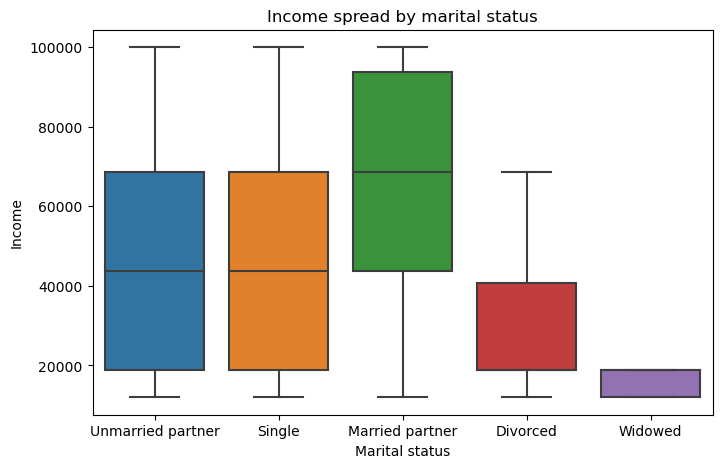

In [276]:
plt.figure(figsize=(8,5))
sns.boxplot(cleanData, x='maritalStatus', y='income')
plt.xlabel("Marital status")
plt.ylabel("Income")
plt.title("Income spread by marital status")
plt.savefig('../images/boxplot.png')

3.1. We observe that Married partners have an average higher income than other marital status. Using this, we can further
     explore how many of each marital status have accepted coupons for restaurants < $20

#### 4. Let's investigate the relation between marital status and acceptance rate

In [277]:
#Let's compare acceptance rate between each marital status
unmarriedP = cleanData.query("maritalStatus == 'Unmarried partner'")['Y'].mean()
singleP = cleanData.query("maritalStatus == 'Single'")['Y'].mean()
marriedP = cleanData.query("maritalStatus == 'Married partner'")['Y'].mean()
divorcedP = cleanData.query("maritalStatus == 'Divorced'")['Y'].mean()
widowedP = cleanData.query("maritalStatus == 'Widowed'")['Y'].mean()
print("Unmarried partner acceptance rate:",format(unmarriedP, '.3%'))
print("Single acceptance rate:",format(singleP, '.3%'))
print("Married partner acceptance rate:",format(marriedP, '.3%'))
print("Divorced acceptance rate:",format(divorcedP, '.3%'))
print("Widowed acceptance rate:",format(widowedP, '.3%'))

Unmarried partner acceptance rate: 71.957%
Single acceptance rate: 72.999%
Married partner acceptance rate: 68.879%
Divorced acceptance rate: 62.712%
Widowed acceptance rate: 55.172%


4.1. Let's visualize these acceptance rates

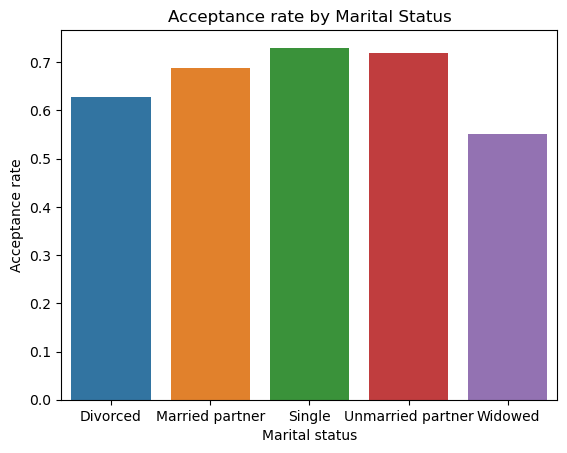

In [278]:
#group data by marital status and find the acceptance rate of coupons. Plot finding on a barplot
group_vals = cleanData.groupby('maritalStatus')['Y'].mean().reset_index()
sns.barplot(group_vals, x='maritalStatus', y='Y')
plt.xlabel("Marital status")
plt.ylabel("Acceptance rate")
plt.title("Acceptance rate by Marital Status")
plt.savefig('../images/maritalAcceptance.png')

4.2. We can see that Single individuals have the highest acceptance rate compared to other marital statuses.

#### 5. Let's now combine these investigations and see the relationship between income coupon acceptance and marital status

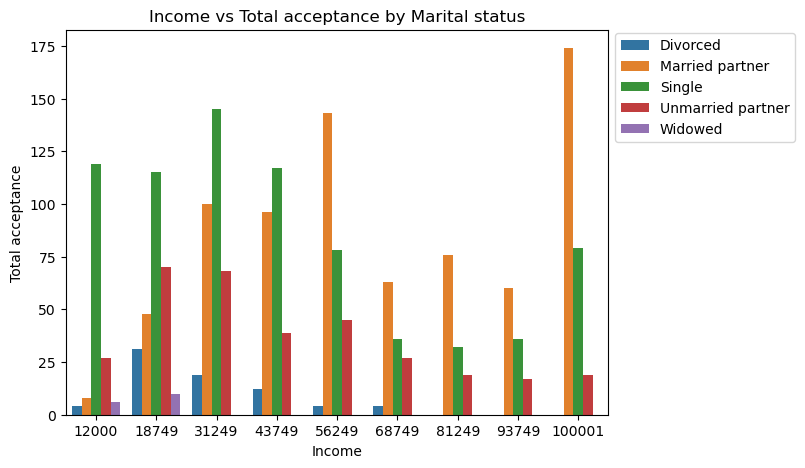

In [134]:
#group data by marital status and income and find the total number of accepted coupons. Plot finding on a barplot
groups = cleanData.groupby(['maritalStatus', 'income'])['Y'].sum().reset_index()
plt.figure(figsize=(7,5))
sns.barplot(groups, x='income', y='Y', hue='maritalStatus').legend(loc='center left', bbox_to_anchor=(1, 0.85))
plt.xlabel("Income")
plt.ylabel("Total acceptance")
plt.title("Income vs Total acceptance by Marital status")
plt.savefig('../images/totalAcc.png', bbox_inches = 'tight')

5.1. When plotting the relationship between all three columns, we can see that when income is lower than $56,249, More single individuals accept the coupon. But income above that value, we see that more married partners accept the coupons. Now let's plot the acceptance rate of each group.

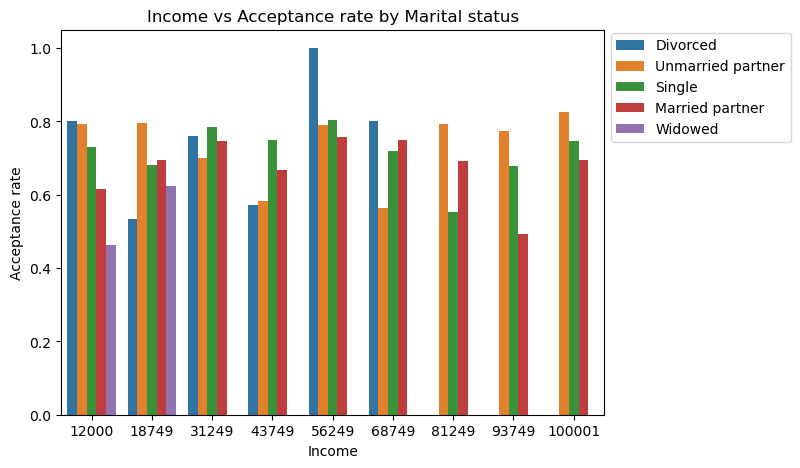

In [135]:
#group data by marital status and income and find the acceptance rate of the coupons. Plot finding on a barplot
groups_mean = cleanData.groupby(['maritalStatus', 'income'])['Y'].mean().reset_index().sort_values(by='Y', ascending=False)
plt.figure(figsize=(7,5))
sns.barplot(groups_mean, x='income', y='Y', hue='maritalStatus').legend(loc='center left', bbox_to_anchor=(1, 0.85))
plt.xlabel("Income")
plt.ylabel("Acceptance rate")
plt.title("Income vs Acceptance rate by Marital status")
plt.savefig('../images/incomeVacc.png', bbox_inches = 'tight')

5.2. We can see a peak acceptance rate in the middle income range for Divorced marital status. Let's see what the percentage is.

In [136]:
peak = cleanData.query("income == 56249 and maritalStatus == 'Divorced'")['Y']
print("Total entries:", peak.count())
print("Acceptance rate: ", peak.mean())

Total entries: 4
Acceptance rate:  1.0


5.3. We see that there are 4 entries and all of them accepted the coupon.

#### 6. Investigate if having children affects acceptance rate by marital status

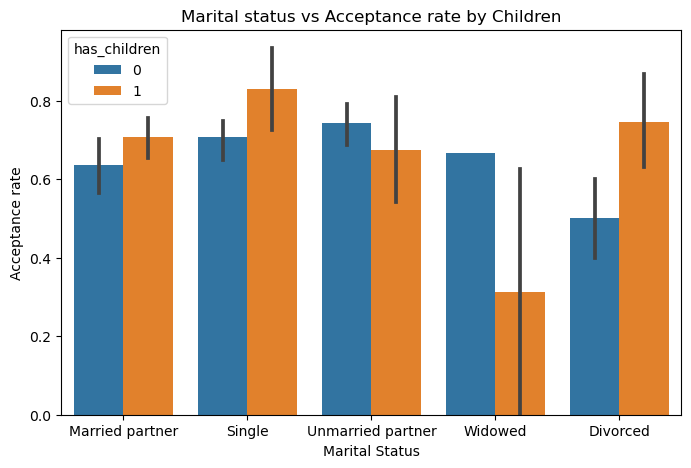

In [137]:
#group data by marital status, income and has children and find the acceptance rate of coupons. Plot finding on a barplot
fig= cleanData.groupby(['income', 'has_children', 'maritalStatus'])['Y'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(fig, x='maritalStatus', y='Y', hue='has_children')
plt.xlabel("Marital Status")
plt.ylabel("Acceptance rate")
plt.title("Marital status vs Acceptance rate by Children")
plt.savefig('../images/maritalAccBych.png', bbox_inches = 'tight')

6.1. From the barplot above, we can see that for married, single and divorced marital statuses, the acceptance rate is higher than when they don't have childern. But if the individual is unmarried or widowed, their acceptance rate with children is less than the acceptance rate without one.

#### 7. Generate a heat map to see the corrolation between all 4 columns

Text(0.5, 1.0, 'Marital status by children vs income acceptance rate')

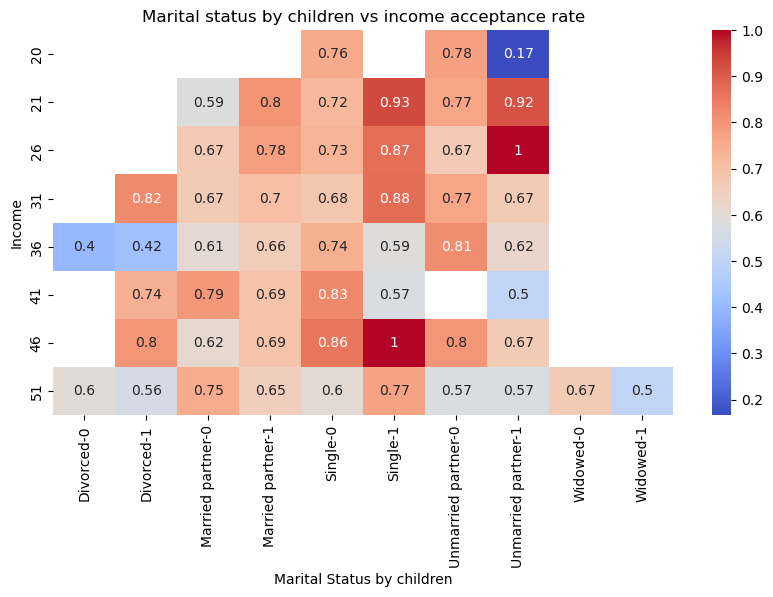

In [221]:
fig2= cleanData.pivot_table(index='age', columns=['maritalStatus', 'has_children'], values='Y', aggfunc='mean')
plt.figure(figsize=(10,5))
sns.heatmap(fig2, cmap='coolwarm', annot=True)
plt.xlabel("Marital Status by children")
plt.ylabel("Income")
plt.title("Marital status by children vs income acceptance rate")
#plt.savefig('../images/heatmap.png', bbox_inches = 'tight')

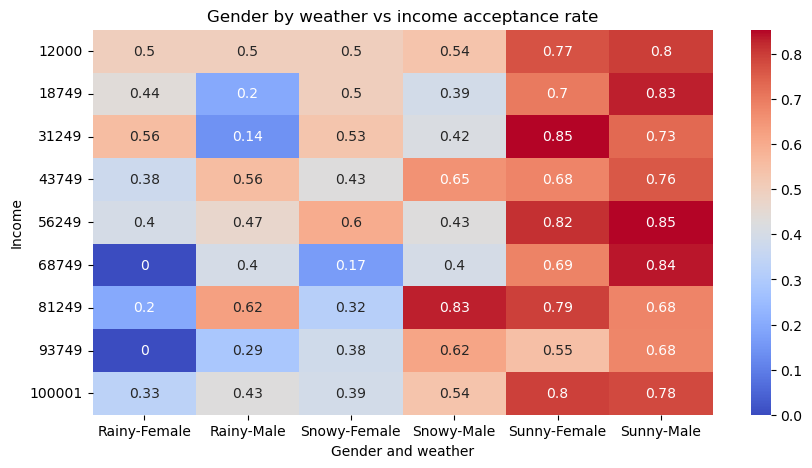

In [229]:
fig2= cleanData.pivot_table(index='income', columns=['weather', 'gender'], values='Y', aggfunc='mean')
plt.figure(figsize=(10,5))
sns.heatmap(fig2, cmap='coolwarm', annot=True)
plt.xlabel("Gender and weather")
plt.ylabel("Income")
plt.title("Gender by weather vs income acceptance rate")
plt.savefig('../images/Genheatmap.png', bbox_inches = 'tight')

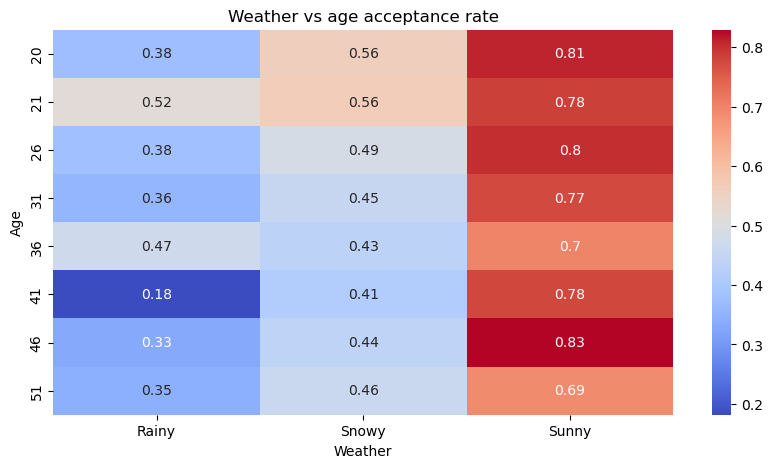

In [225]:
fig2= cleanData.pivot_table(index='age', columns=['weather'], values='Y', aggfunc='mean')
plt.figure(figsize=(10,5))
sns.heatmap(fig2, cmap='coolwarm', annot=True)
plt.xlabel("Weather")
plt.ylabel("Age")
plt.title("Weather vs age acceptance rate")
plt.savefig('../images/Weatheatmap.png', bbox_inches = 'tight')